# Text Mining aplicado a la Tesorería de Tucuman

## Problema

Se desarrolló un documento disponible en https://docs.google.com/document/d/1QpHmWQ-QzxrsqB8v-XjnfeSde37s38dsABlI-wB2-g4/edit

Repositorio: https://github.com/ivanjavierparra/Text-Mining-Austral

Diccionario de datos

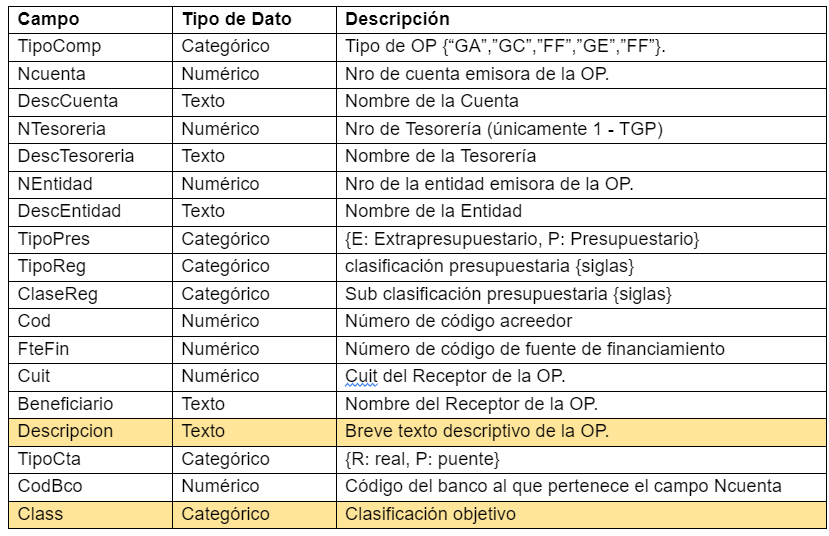

Bibliotecas

In [ ]:
import pandas as pd
import preprocessing
import train_lightgbm
import test_lightgbm
import train_onevsrest
import test_onevsrest
import train_rn
import warnings
import os
warnings.filterwarnings("ignore")

Creacion de carpetas para los modelos

In [2]:

os.makedirs("models",exist_ok=True)
os.makedirs("models/lgbm", exist_ok=True)
os.makedirs(f"models/lgbm/modelo_base", exist_ok=True)   
os.makedirs(f"models/lgbm/modelo_text_mining", exist_ok=True)   
os.makedirs(f"models/lgbm/modelo_completo", exist_ok=True)   
os.makedirs(f"models/lgbm/modelo_tfidf", exist_ok=True)   


os.makedirs("models",exist_ok=True)
os.makedirs("models/onevsrest", exist_ok=True)
os.makedirs(f"models/onevsrest/modelo_base", exist_ok=True)   
os.makedirs(f"models/onevsrest/modelo_text_mining", exist_ok=True)   
os.makedirs(f"models/onevsrest/modelo_completo", exist_ok=True)   
os.makedirs(f"models/onevsrest/modelo_tfidf", exist_ok=True)   


os.makedirs("models",exist_ok=True)
os.makedirs("models/randomforest", exist_ok=True)
os.makedirs(f"models/randomforest/modelo_base", exist_ok=True)   
os.makedirs(f"models/randomforest/modelo_text_mining", exist_ok=True)   
os.makedirs(f"models/randomforest/modelo_completo", exist_ok=True)   
os.makedirs(f"models/randomforest/modelo_tfidf", exist_ok=True)   

## EDA

Hicimos un Notebook a parte llamdo __EDA.ipynb__

## Preprocessing

In [ ]:
import importlib 
import preprocessing
importlib.reload(preprocessing)
preprocessing.preprocess()

Aquí lo que hicimos fue:
- eliminamos columnas que no servían, 
- imputamos NA's
- Covertimos el campo Class de categórico a numérico (es nuestra variable target)
- hicimos un preprocesamiento de texto

Procesamiento de texto:
- Quedarnos solo con los números y letras: expresiones regulares
- Separar el texto de los números
- Eliminar espacios adicionales
- Eliminar las stopwords
- Aplicar tokenización y lematización
- Filtrar aquellas palabras cuya longitud es mínimo 3 caracteres. 

## Feature Engineering

In [ ]:
import importlib 
import feature_engineering
importlib.reload(feature_engineering)
feature_engineering.fe()

Lo que hicimos fue:
- Crear variables de texto tanto para la Descripción sin procesar como procesada: longitud, cantidad de palabras.
- Aplicar OneHotEncoding a las variables categóricas
- Asignamos pesos a las palabras del campo texto_limpio
- Estandarizamos los pesos anteriores

## Modelos

Para el presente trabajo, decidimos utilizar tres algoritmos y evaluar su performance:
- LightGBM
- Gradient Boosting
- Random Forest

Decidimos crear 4 escenarios para cada uno de los modelos:
- Escenario 1: lo llamamos modelo_base, y consiste en usar los datos crudos, sin aplicar el preprocesamiento de texto.
- Escenario 2: lo llamamos modelo_text_mining: aplicamos preprocesamiento y feature engineering completo, acá ya tenemos los pesos calculados.
- Escenario 3: lo llamamos modelo_completo. Al el Escenario 2 le agregamos TF-IDF
- Escenario 4: lo llamamos modelo_tf_idf porque solo usamos como input la salida de este modelo.

### Modelo Base

Accuracy

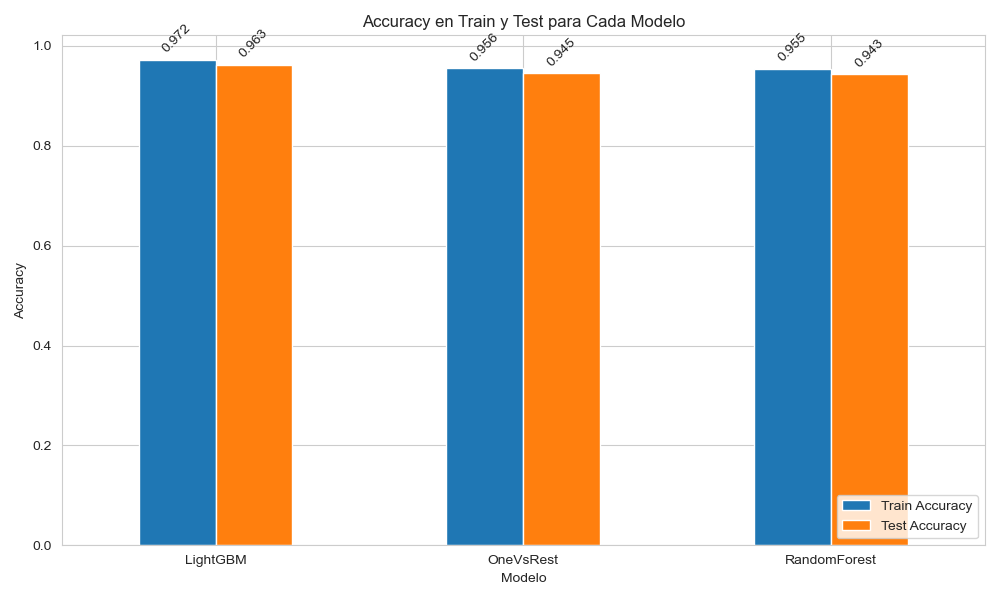

### Modelo Text Mining

Accuracy

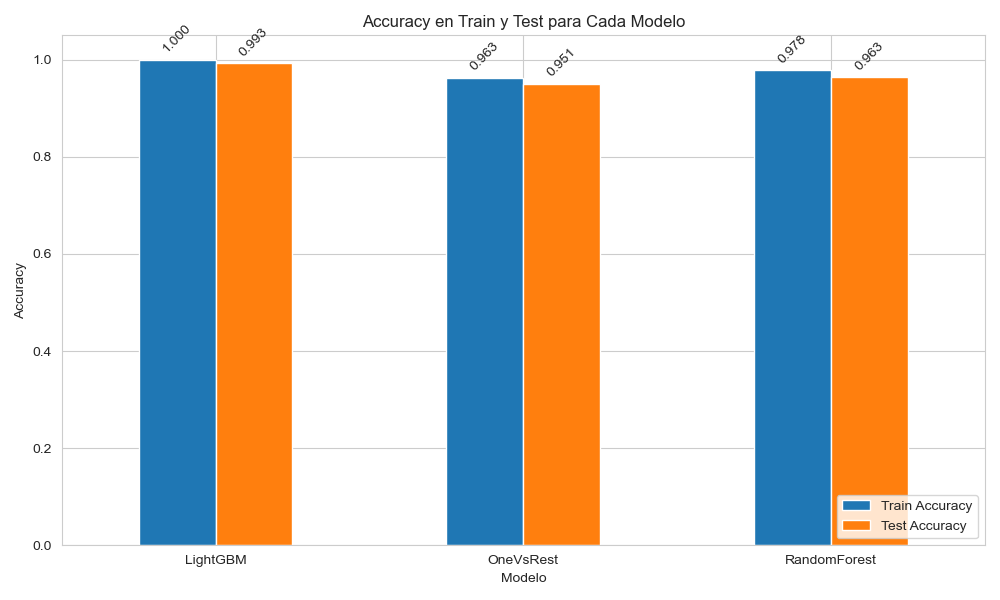

### Modelo Completo

Accuracy

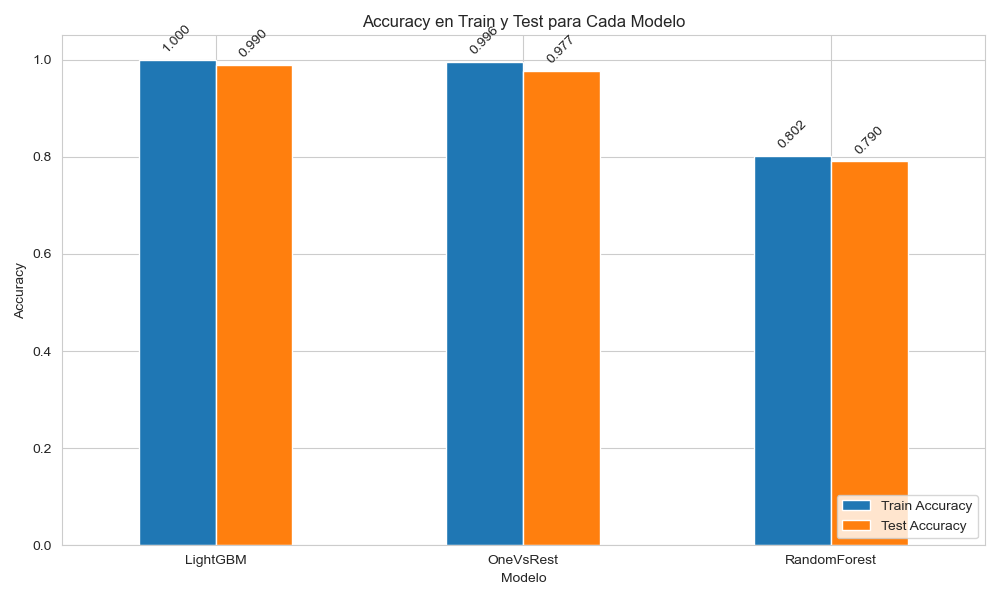

### Modelo TF-IDF

Accuracy

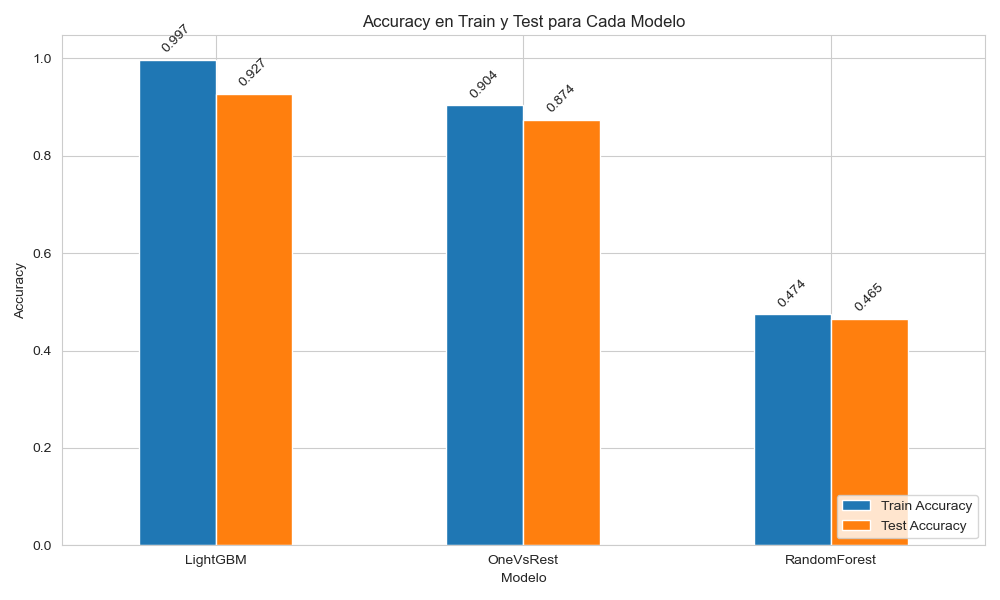

## Red Neuromal: AutoKeras

Decidimos aplicar AutoKeras para realizar text classification sobre nuestro campo Descripción

Para lo cual creamos 3 escenarios:
- Escenario 1: aplicar autokeras al campo descripción sin procesar, crudo.
- Escenario 2: aplicar autokeras al campo descripción ya procesado.
- Escenario 3: aplicar autokeras al campo descripción ya procesado pero quitandole las palabras más frecuentes como RES, CTA, etc.

Los resultados están en el notebook __autokeras_text_classification.ipynb__

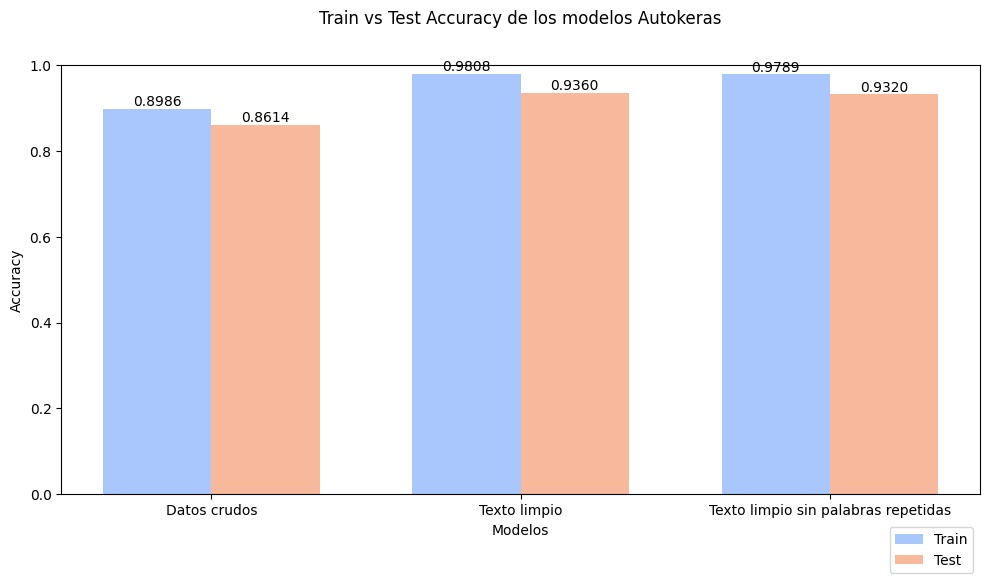

## Text Mining

El análisis del campo "texto_limpio" que corresponde al preprocesamiento aplicado al campo de texto "Descripcion" se encuentra en el notebook __text_mining.ipynb__